In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from catalog_matching.catalog_matching import extract_extensions

%matplotlib inline

# Set plotting environment
import matplotlib
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 14}
fs = 14
matplotlib.rc('font', **font)

## Load final membership tables, references, and colors for plotting and annotating

In [2]:
paths = !ls -r catalog_matching/matched_catalogs/k2_matches_to_union/*csv
paths = np.array(paths)
refsdict = pickle.load(open('plots/final_sample/references_and_colors.p', 'rb'))
names = [('praesepe', "Praesepe"),
         ('pleiades', 'Pleiades'),
         ('ngc6774', 'Ruprecht 147'),
         ('ngc2682', 'M67'),
         ('ngc2168', 'M35'),
         ('hyades', 'Hyades')]

## Create all plots in one loop

The final sample that contains only targets with mean membership probability $p > 0.8$. The panels show histograms of members in each cluster broken down by membership study. Colored unfilled histograms show individual studies. Grey filled histograms represent the mean of all individual studies for one cluster. Black and red histograms are K2 and PSF derived 30 min cadence LCs, repsectively.

/projects/9dc5265b-65df-4b97-a75c-b93da4cee0c3/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/projects/9dc5265b-65df-4b97-a75c-b93da4cee0c3/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


M67 has 1019 PSF de-trended light curves.


M35 has 158 PSF de-trended light curves.


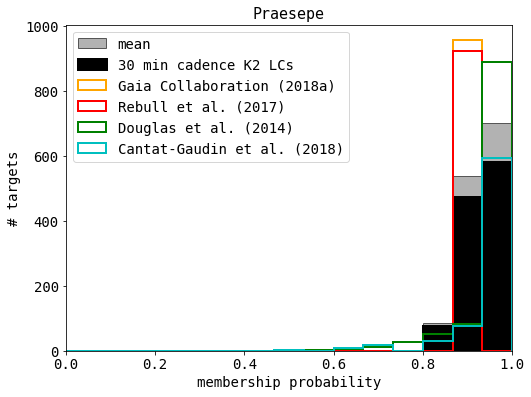

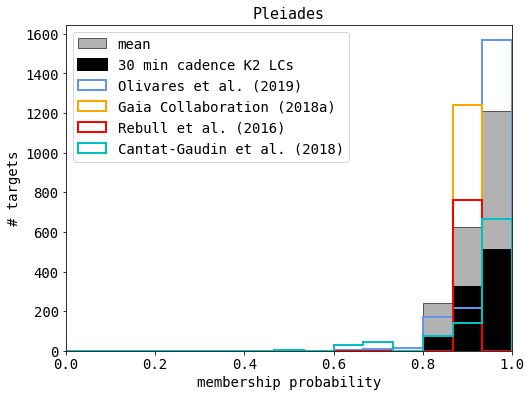

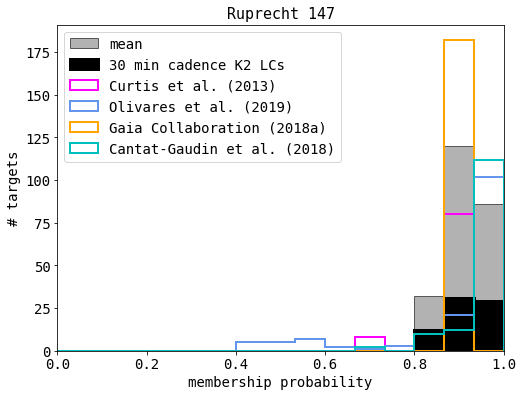

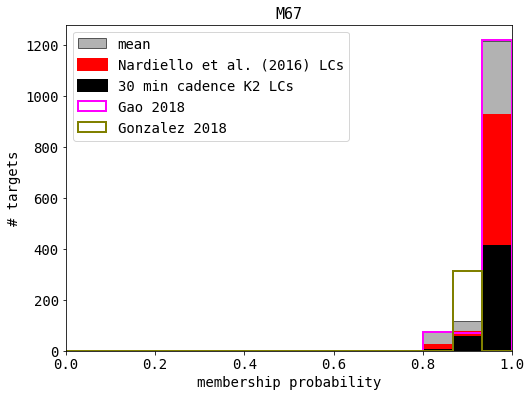

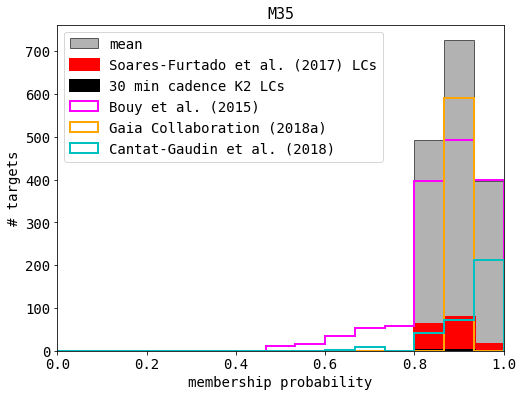

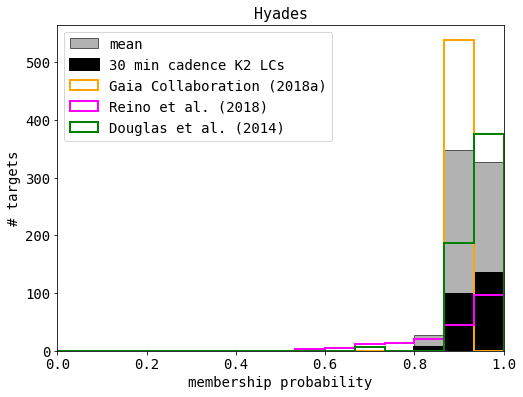

In [3]:
for C, Cfull in names:

    #print(Cfull)
    # find path to file
    
    pindex = np.flatnonzero(np.core.defchararray.find(paths, C) != -1)[0]
    dfp = pd.read_csv(paths[pindex])
    
    # find membership studies for each cluster
    
    l = extract_extensions(dfp, prefix='PMem', retcolnames=True)
    l.remove("PMem_mean")

    # create histograms
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    # Display all filled histograms first
    
    plt.hist(dfp.PMem_mean.values, bins=15, range=(0.,1.), 
             histtype='stepfilled', color='grey', edgecolor='k', alpha=0.6,
             label='mean')
    
    # M35 and M67 are far away and use PSF derived LCs, too:
    
    if C == 'ngc2168':
        print("M35 has {} PSF de-trended light curves.".format(dfp.loc[~dfp['2MASS_id_SF'].isnull(), "PMem_mean"].values.shape[0]))
        plt.hist(dfp.loc[~dfp['2MASS_id_SF'].isnull(), "PMem_mean"].values, bins=15, range=(0.,1.), 
                 histtype='stepfilled', facecolor='r', edgecolor='r', linewidth=3,
                 label='Soares-Furtado et al. (2017) LCs')
    if C == 'ngc2682':
        print("M67 has {} PSF de-trended light curves.".format(dfp.loc[~dfp.id_N.isnull(), "PMem_mean"].values.shape[0]))
        plt.hist(dfp.loc[~dfp.id_N.isnull(), "PMem_mean"].values, bins=15, range=(0.,1.), 
                 histtype='stepfilled', facecolor='r', edgecolor='r', linewidth=3,
                 label='Nardiello et al. (2016) LCs')
    
    # Only a fraction of all members is equipped with K2 LCs
    
    plt.hist(dfp.loc[dfp["Target Type"] == "LC", "PMem_mean"].values, bins=15, range=(0.,1.), 
             histtype='stepfilled', facecolor='k', edgecolor='k', linewidth=3,
             label='30 min cadence K2 LCs')
    
    # Also show the individual studies on top:
    
    for key in l:
        #print(key)
        plt.hist(dfp[key], histtype='step', bins=15, range=(0.,1.),
             label=refsdict[key][1][C], linewidth=2, color=refsdict[key][0])
        

    # Do some labelling and formatting
    
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    plt.xlabel('membership probability', fontsize=fs)
    plt.ylabel('# targets', fontsize=fs)
    plt.title('{}'.format(Cfull), fontsize=fs+1)
    plt.legend(loc=2, fontsize=fs)
    plt.xlim(0, 1)
    
    # Voila:
    
    plt.savefig('plots/final_sample/{}_mean_membership_probabilities_histogram.png'.format(C), dpi=300)